### Importing Libraries for NLP and Visualization

This section loads the required Python libraries for text processing, natural language analysis, and data visualization.

**Libraries:**
- **pandas** – Data manipulation and analysis.
- **nltk** – Natural Language Toolkit for tokenization, frequency analysis, bigram generation, and POS tagging.
- **string** – Provides access to common string operations and punctuation constants.
- **wordcloud** – Generates word cloud visualizations from text data.
- **matplotlib** – Creates static visualizations such as word clouds.
- **plotly.express** – Generates interactive visualizations for data exploration.


In [12]:
# 📦 Import necessary libraries for NLP and visualization
import pandas as pd
import nltk
from nltk import word_tokenize, FreqDist, bigrams, pos_tag
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px


### Downloading Required NLTK Data

Before running NLP operations, download essential NLTK datasets and models:

- **punkt** – Pre-trained tokenizer model for sentence and word tokenization.
- **stopwords** – List of common words to filter out during text analysis.
- **averaged_perceptron_tagger** – Part-of-speech (POS) tagging model.

*Note:* This step only needs to be run once on a given environment.


In [13]:
# 📥 Download NLTK corpora and models — run this once
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ssara\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Load Cleaned GoodRx Data

Reads the cleaned GoodRx dataset from `goodrx_cleaned_data.csv` into a DataFrame for analysis,  
and displays the first few rows to confirm successful loading and inspect the structure.


In [14]:
# 📄 Load cleaned GoodRx data
df = pd.read_csv("goodrx_cleaned_data.csv")

# Preview the first few rows
df.head()


,drug,location,dosage,quantity,pharmacy,price,special_offer,standard_coupon_price,special_coupon_price,online_pharmacy,city
0,Atorvastatin,10001,40mg,30 tablets,CVS Pharmacy,19.67,special offers,28.77,19.67,False,New York
1,Atorvastatin,10001,40mg,30 tablets,Walgreens,11.72,special offers,21.72,11.72,False,New York
2,Atorvastatin,10001,40mg,30 tablets,ShopRite,10.34,no special offer,NaN,NaN,False,New York
3,Atorvastatin,10001,40mg,30 tablets,Walmart,7.74,special offers,15.24,7.74,False,New York
4,Atorvastatin,10001,40mg,30 tablets,Duane Reade,11.72,special offers,21.72,11.72,False,New York


### Function: `preprocess_text`

Prepares textual data for NLP analysis by standardizing and cleaning it.

**Purpose:**
- Convert all text to lowercase for uniformity.
- Remove punctuation and common English stopwords.
- Tokenize text into individual words.

**Parameters:**
- `series` *(pandas.Series)*: Column of text data to preprocess.

**Returns:**
- **List[str]**: Collection of cleaned tokens from the input text.


In [15]:
# 🔧 Preprocess text by lowercasing, removing punctuation and stopwords
def preprocess_text(series):
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    tokens = []
    for text in series.dropna().astype(str):
        words = word_tokenize(text.lower())
        filtered = [w for w in words if w not in stop_words and w not in punctuation]
        tokens.extend(filtered)
    return tokens


### Hypothesis 1 (H1): Most Common Words in Pharmacy Names

**Goal:**  
Identify the most frequently occurring words in the names of pharmacies listed in the dataset.

**Process:**
1. Preprocess the `pharmacy` column using `preprocess_text()` to remove punctuation, stopwords, and normalize text.
2. Generate a frequency distribution of tokens.
3. Display the top 10 most common words.

**Returns:**
- A list of tuples containing the word and its corresponding frequency.


In [16]:
# H1: Find most common words used in pharmacy names
def analyze_pharmacy_words(df):
    tokens = preprocess_text(df['pharmacy'])
    return FreqDist(tokens).most_common(10)

# Run H1 analysis
analyze_pharmacy_words(df)


[('pharmacy', 98),
 ('cvs', 43),
 ('walgreens', 42),
 ('walmart', 41),
 ('pay', 32),
 ('online', 32),
 ('target', 21),
 ('costco', 21),
 ('capsule', 21),
 ('specialty', 21)]

### Hypothesis 1 Extension: POS Tagging on Pharmacy Names

**Goal:**  
Analyze the grammatical structure of the most common words found in pharmacy names.

**Process:**
1. **Tokenization & Cleaning:**  
   - Use `preprocess_text()` to generate cleaned tokens from the `pharmacy` column.  
2. **POS Tagging:**  
   - Apply NLTK’s `pos_tag()` to label each token with its Part-of-Speech (POS).
3. **Frequency Analysis:**  
   - Count the top 10 most common POS tags.
4. **Visualization:**  
   - Create a bar chart (Plotly) to show POS tag frequencies.
5. **Interpretation:**  
   - Provide definitions for each of the top POS tags for better understanding.

**Returns:**
- POS-tagged token list.
- POS tag frequency distribution.
- Interactive bar chart of POS tags.
- Printed tag descriptions.


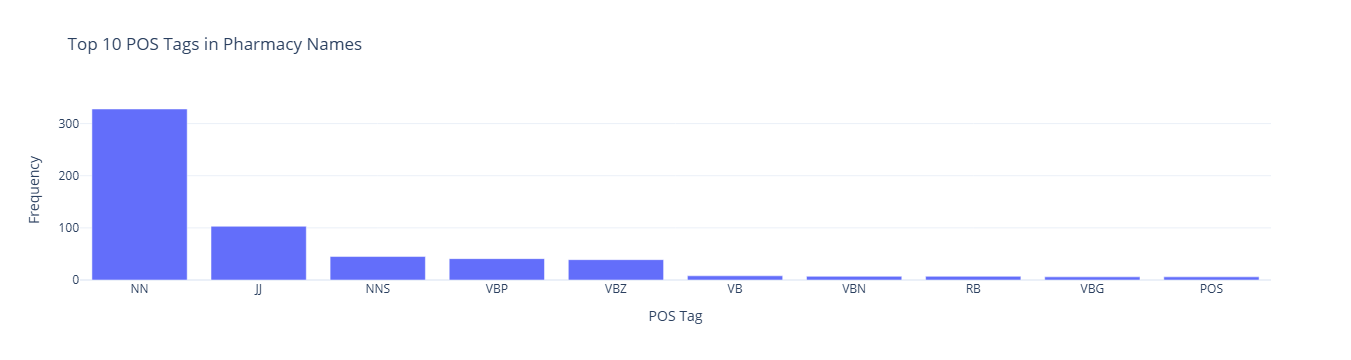


📘 POS Tag Definitions:
NN: Noun (Singular)
JJ: Adjective
NNS: Noun (Plural)
VBP: Unknown/Other
VBZ: Unknown/Other
VB: Verb (Base Form)
VBN: Verb (Past Participle)
RB: Adverb
VBG: Verb (Gerund/Present Participle)
POS: Unknown/Other


In [17]:
# H1 Extension: POS tagging on pharmacy name tokens
def analyze_pharmacy_pos_tags(df):
    tokens = preprocess_text(df['pharmacy'])  # Cleaned tokens from 'pharmacy'
    tagged = pos_tag(tokens)                  # Tag each token with its part-of-speech
    pos_counts = pd.Series([tag for _, tag in tagged]).value_counts().head(10)
    return tagged, pos_counts

# 📈 Visualize POS tag frequency using Plotly (dark theme)
def plot_pos_distribution(pos_counts):
    fig = px.bar(
        x=pos_counts.index,
        y=pos_counts.values,
        labels={'x': 'POS Tag', 'y': 'Count'},
        title='Top 10 POS Tags in Pharmacy Names',
        template='plotly_white'
    )
    fig.update_layout(xaxis_title='POS Tag', yaxis_title='Frequency')
    fig.show()

# 📘 POS tag descriptions for reference (top 10 common tags)
def explain_pos_tags(tag_list):
    tag_dict = {
        "NN": "Noun (Singular)",
        "NNS": "Noun (Plural)",
        "JJ": "Adjective",
        "RB": "Adverb",
        "VB": "Verb (Base Form)",
        "VBD": "Verb (Past Tense)",
        "VBG": "Verb (Gerund/Present Participle)",
        "VBN": "Verb (Past Participle)",
        "IN": "Preposition/Subordinating Conjunction",
        "DT": "Determiner",
        "CC": "Coordinating Conjunction",
        "PRP": "Personal Pronoun",
        "TO": "to (as preposition)",
        "CD": "Cardinal Digit",
        "MD": "Modal (can, will, must)",
        "EX": "Existential 'there'",
    }
    print("\n📘 POS Tag Definitions:")
    for tag in tag_list.index:
        meaning = tag_dict.get(tag, "Unknown/Other")
        print(f"{tag}: {meaning}")

# ✅ Run tagging, plot results, and explain
_, pos_counts = analyze_pharmacy_pos_tags(df)
plot_pos_distribution(pos_counts)
explain_pos_tags(pos_counts)


### Hypothesis 1 Extension: Word Cloud of Pharmacy Names

**Goal:**  
Visualize the most frequently occurring words in pharmacy names in an intuitive, graphical format.

**Process:**
1. Combine all pharmacy names into a single text string.
2. Generate a word cloud where:
   - The size of each word corresponds to its frequency in the dataset.
   - A `viridis` color map is applied for visual appeal.
3. Display the word cloud using Matplotlib.

**Outcome:**
- Quickly identify prominent words or patterns in pharmacy naming conventions.


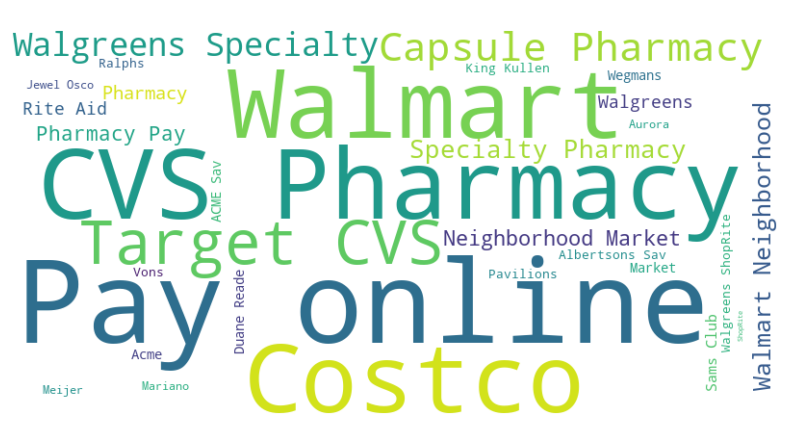

In [19]:
# H1 Extension: Word cloud of pharmacy names
def generate_pharmacy_wordcloud(df):
    text = ' '.join(df['pharmacy'].dropna().astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Pharmacy Names', color='white')
    plt.show()

# Display word cloud
generate_pharmacy_wordcloud(df)


### Hypothesis 2: Drugs Most Frequently Promoted via Special Offers

**Goal:**  
Identify which drugs appear most often in listings that include special offers.

**Approach:**  
We focus only on records where a special offer is mentioned, then analyze and visualize which drugs dominate in these promotions.

**Process:**
1. Filter the dataset for rows where the `special_offer` column contains the word "special".
2. Count occurrences of each drug in this filtered dataset.
3. Select the top 10 most frequently promoted drugs.
4. Visualize the distribution as a pie chart using Plotly, showing each drug’s proportion of total special offers.

**Outcome:**
- Highlights which medications are most often incentivized with special offers.


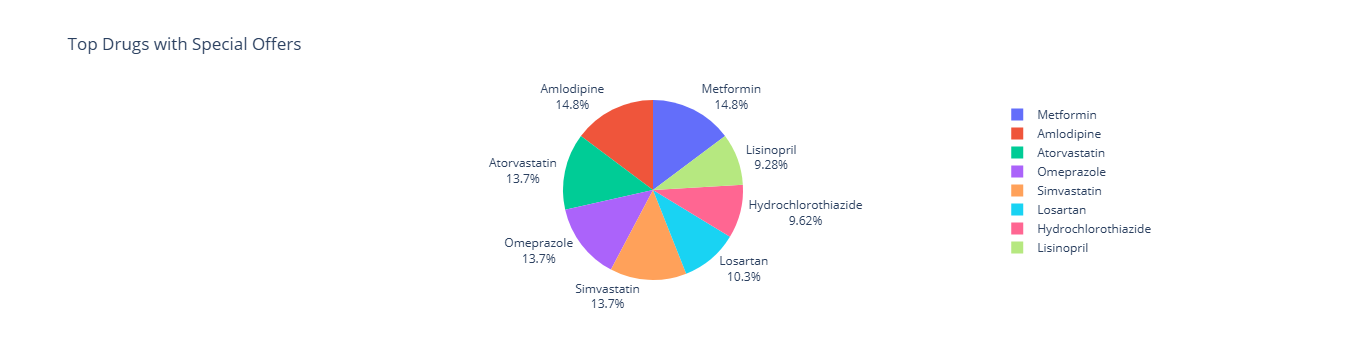

In [8]:
# 💊 Identify drugs most frequently promoted via special offers
def analyze_special_offer_drugs(df):
    offer_drugs = df[df['special_offer'].str.contains("special", case=False, na=False)]
    return offer_drugs['drug'].value_counts().head(10)

# 📈 Pie chart to visualize proportion of drug offers
def plot_special_offer_drugs_pie(data):
    fig = px.pie(
        names=data.index,
        values=data.values,
        title="Top Drugs with Special Offers",
        template="plotly_white"
    )
    fig.update_traces(textinfo="label+percent")
    fig.show()

# Run and plot
top_offer_drugs = analyze_special_offer_drugs(df)
plot_special_offer_drugs_pie(top_offer_drugs)



### Hypothesis 3: Cities with the Most Frequent Special Offers

**Goal:**  
Determine which cities have the highest number of pharmacy listings that include special offers.

**Process:**
1. Filter the dataset for rows where the `special_offer` column contains the word "special".
2. Count the occurrences of each city in the filtered dataset.
3. Select the top 10 cities with the highest counts.
4. Visualize the results as a horizontal bar chart using Plotly.

**Outcome:**
- Identifies geographic locations where special offers are most prevalent.


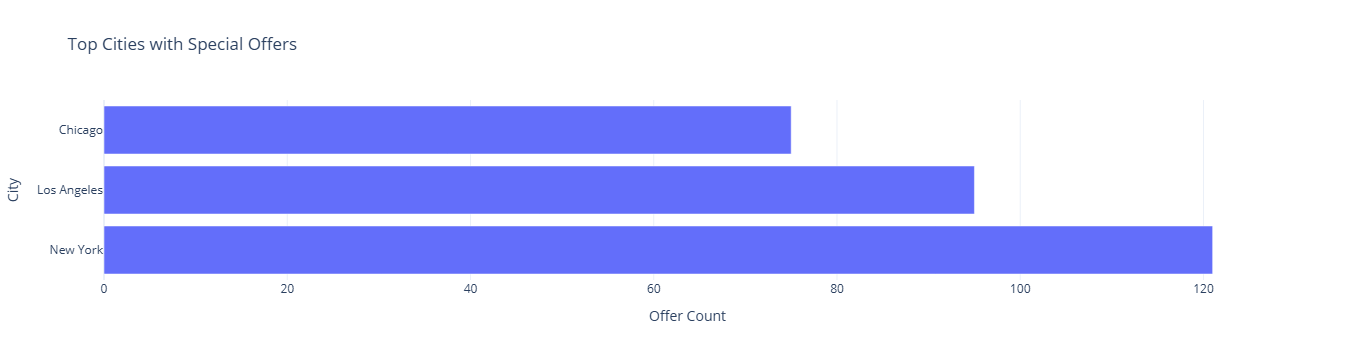

In [21]:
# 🌍 Identify cities with the most frequent special offers
def analyze_special_offer_cities(df):
    offer_cities = df[df['special_offer'].str.contains("special", case=False, na=False)]
    return offer_cities['city'].value_counts().head(10)

# 📈 Horizontal bar chart
def plot_special_offer_cities_bar(data):
    fig = px.bar(
        x=data.values,
        y=data.index,
        orientation='h',
        title='Top Cities with Special Offers',
        labels={'x': 'Offer Count', 'y': 'City'},
        template='plotly_white'
    )
    fig.show()

# Run and plot
top_offer_cities = analyze_special_offer_cities(df)
plot_special_offer_cities_bar(top_offer_cities)


### Hypothesis 4: Most Frequent Two-Word Combinations in Drug and Pharmacy Names

**Goal:**  
Identify the most common two-word sequences (bigrams) appearing in combined drug and pharmacy names.

**Process:**
1. Concatenate the `drug` and `pharmacy` columns into a single string for each record.
2. Preprocess the combined text using `preprocess_text()` to clean and tokenize it.
3. Generate bigrams (two-word combinations) from the tokens.
4. Count the top 10 most frequent bigrams.
5. Visualize the results as a bar chart using Plotly.

**Outcome:**
- Reveals common word pairings that may indicate branding patterns or frequently paired drug–pharmacy names.


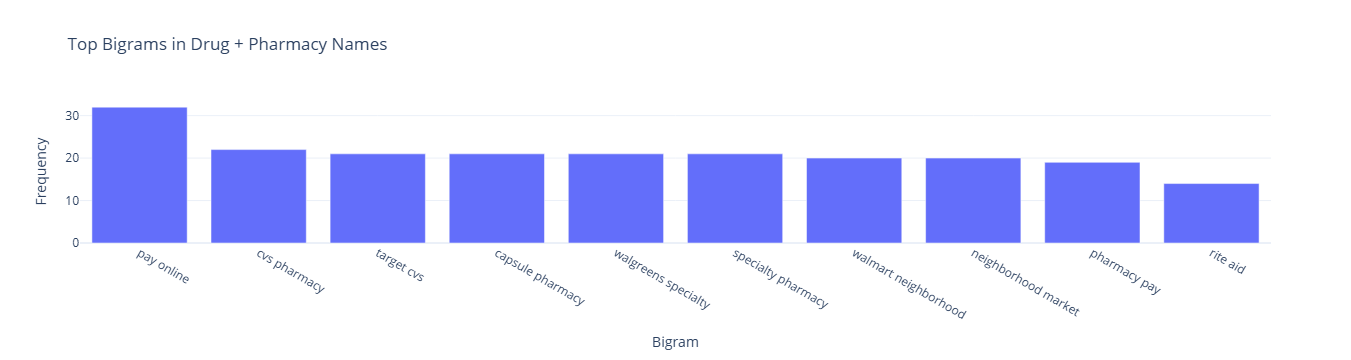

In [23]:
# 🔠 Extract and count most frequent two-word combinations
def analyze_common_bigrams(df):
    combined = df['drug'].astype(str) + " " + df['pharmacy'].astype(str)
    tokens = preprocess_text(combined)
    bigram_freq = FreqDist(bigrams(tokens)).most_common(10)
    return pd.DataFrame(bigram_freq, columns=["Bigram", "Count"])

# 📈 Plot bigrams
def plot_common_bigrams_bar(data):
    bigram_labels = [' '.join(b) for b in data['Bigram']]
    fig = px.bar(
        x=bigram_labels,
        y=data['Count'],
        title="Top Bigrams in Drug + Pharmacy Names",
        labels={'x': 'Bigram', 'y': 'Frequency'},
        template='plotly_white'
    )
    fig.show()

# Run and plot
bigram_df = analyze_common_bigrams(df)
plot_common_bigrams_bar(bigram_df)


### Hypothesis 5: Online vs. Offline Special Offer Distribution

**Goal:**  
Compare how frequently special offers occur in online pharmacies versus physical (offline) pharmacies.

**Process:**
1. Filter the dataset for rows where the `special_offer` column contains the word "special".
2. Count how many of these offers are associated with online pharmacies versus offline pharmacies, based on the `online_pharmacy` boolean column.
3. Visualize the proportions as a donut chart using Plotly.

**Outcome:**
- Highlights whether special offers are more common in online or physical pharmacy listings.


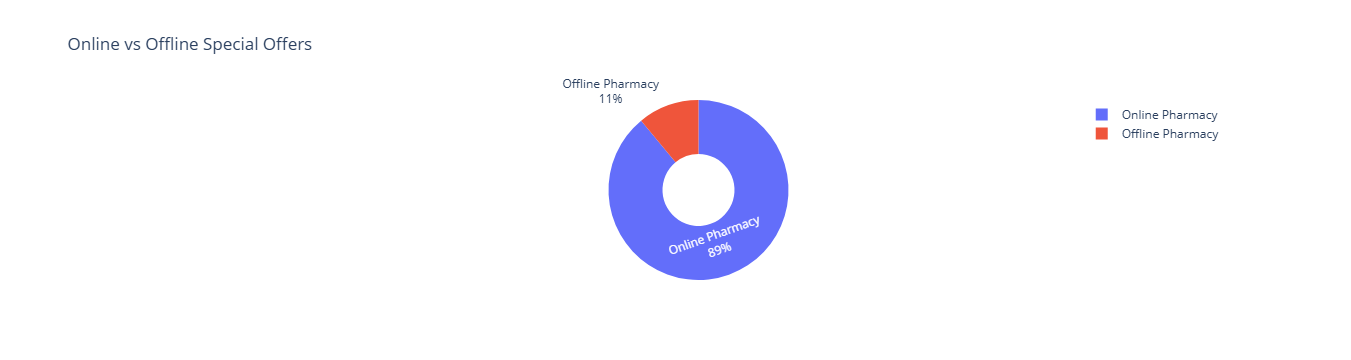

In [24]:
# 🌐 Compare offer distribution across online vs physical pharmacies
def analyze_online_offer_ratio(df):
    offer_counts = df[df['special_offer'].str.contains("special", case=False, na=False)]
    return offer_counts['online_pharmacy'].value_counts()

# 📈 Donut chart for share visualization
def plot_offer_ratio_donut(data):
    labels = ['Online Pharmacy', 'Offline Pharmacy'] if True in data.index else data.index.astype(str)
    fig = px.pie(
        names=labels,
        values=data.values,
        title="Online vs Offline Special Offers",
        hole=0.4,
        template='plotly_white'
    )
    fig.update_traces(textinfo='label+percent')
    fig.show()

# Run and plot
online_offer_counts = analyze_online_offer_ratio(df)
plot_offer_ratio_donut(online_offer_counts)
